# Example: Random Walks

In [1]:
import numpy as np

In [3]:
# ! blockstart
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
# ! blockend

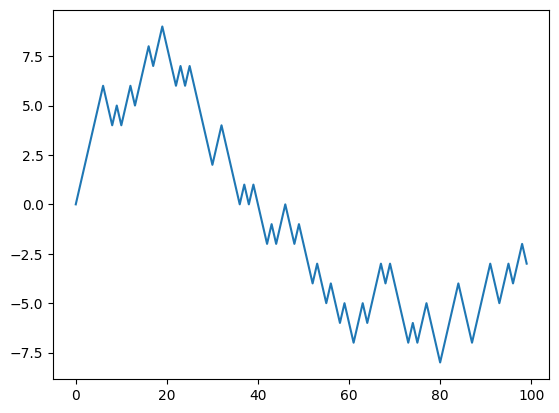

In [4]:
import matplotlib.pyplot as plt

plt.plot(walk[:100])

In [7]:
nsteps = 1000
rng = np.random.default_rng(seed=12345) # fresh random generator
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws==0, 1, -1)
walk = steps.cumsum()

In [8]:
walk.min()

np.int64(-37)

In [9]:
walk.max()

np.int64(4)

In [10]:
(np.abs(walk) >= 10).argmax()

np.int64(171)

### Simulating Many Random Walks at Once

In [11]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws>0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[ -1,   0,  -1, ...,   0,  -1,   0],
       [  1,   0,   1, ...,  32,  31,  32],
       [  1,   0,  -1, ...,  10,  11,  12],
       ...,
       [  1,   0,   1, ..., -10,  -9,  -8],
       [  1,   0,   1, ...,  20,  19,  20],
       [  1,   2,   3, ...,  -2,  -1,   0]])

In [12]:
walks.max()

np.int64(111)

In [13]:
walks.min()

np.int64(-124)

In [14]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([False,  True, False, ...,  True, False, False])

In [15]:
hits30.sum()

np.int64(3361)

In [16]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([839, 227, 485, ..., 435, 295, 469])

In [17]:
crossing_times.mean()

np.float64(491.318952692651)

In [18]:
draws = 0.25 * np.random.standard_normal((nwalks, nsteps))